In [11]:
import numpy as np
import matplotlib.pyplot as plt

def phi(i,x,nodVec):
    n=len(nodVec)-1
    if i==0:
        def tramo1(x):
            return (nodVec[1]-x)/(nodVec[1]-nodVec[0])
        return np.piecewise(x,[(nodVec[0]<=x) & (x<=nodVec[1])],[lambda x:tramo1(x)]) 
    elif i==n:
        def tramo1(x):
            return (x-nodVec[n-1])/(nodVec[n]-nodVec[n-1])
        return np.piecewise(x,[(nodVec[n-1]<=x) & (x<=nodVec[n])],[lambda x:tramo1(x)]) 
    else:
        def tramo1(x):
            return (x-nodVec[i-1])/(nodVec[i]-nodVec[i-1])
        def tramo2(x):
            return (nodVec[i+1]-x)/(nodVec[i+1]-(nodVec[i]))
        return np.piecewise(x,[(nodVec[i-1]<=x) & (x<=nodVec[i]),(nodVec[i]<=x) & (x<=nodVec[i+1])],[lambda x:tramo1(x),lambda x: tramo2(x)])

def dphi(i,x,nodVec):
  n=len(nodVec)-1
  if i==0:
    def tramo(x):
      return -1/(nodVec[1]-nodVec[0])
    return np.piecewise(x,[(nodVec[0]<=x) & (x<=nodVec[1])],[lambda x:tramo(x)])
  elif i==n: 
    def tramo(x):
      return 1/(nodVec[n]-nodVec[n-1])
    return np.piecewise(x,[(nodVec[n-1]<=x) & (x<=nodVec[n])],[lambda x:tramo(x)])
  else:
    def tramo1(x):
            return 1/(nodVec[i]-nodVec[i-1])
    def tramo2(x):
            return -1/(nodVec[i+1]-(nodVec[i]))
    return np.piecewise(x,[(nodVec[i-1]<=x) & (x<=nodVec[i]),(nodVec[i]<=x) & (x<=nodVec[i+1])],[lambda x:tramo1(x),lambda x: tramo2(x)]) 

In [22]:
a =0; b = 1 #Dominio del problema
crearNodosManual = False;        
if (crearNodosManual):
    nodVec = np.array([a,a+0.3,a+0.7,b])
else: 
    N=7 #Número de nodos
    nodVec=np.linspace(a,b,N) # generando nodos equiespaciados

print(nodVec)

[0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.        ]


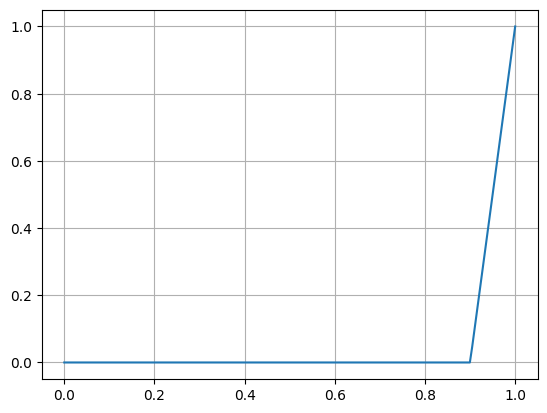

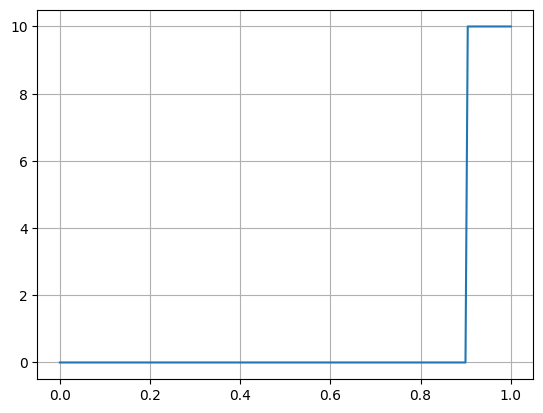

In [12]:
''' Gráfica de phi(i,x)''' 
# i=0, ..., N-1
i=10
x = np.linspace(a,b,200)
y=phi(i,x,nodVec)
plt.grid()
plt.plot(x,y)
#plt.plot(nodVec[i],1,'o')
plt.show()

y1=dphi(i,x,nodVec)
plt.grid()
plt.plot(x,y1)
#plt.plot(nodVec[i],1,'o')
plt.show()

nDofs:
 5
L:
 [ 1.66666667e-01  1.80732652e-10 -1.66666667e-01 -3.33333333e-01
 -5.00000000e-01]
K:
 [[12. -6.  0.  0.  0.]
 [-6. 12. -6.  0.  0.]
 [ 0. -6. 12. -6.  0.]
 [ 0.  0. -6. 12. -6.]
 [ 0.  0.  0. -6. 12.]]


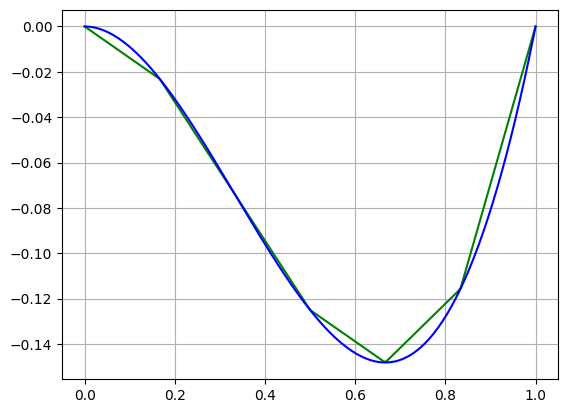

In [23]:
''' Ensamblage y resolución del sistema de ecuaciones lineales caso homogéneo'''
from scipy.integrate import quad
import numpy as np
import numpy.linalg as la 

def f(x):
  return -6*x+2

nDofs = len(nodVec)-2
print("nDofs:\n",nDofs)

''' Cálculo del vector de carga'''
L = np.zeros(nDofs)
for i in range(0,nDofs):
  def aux(x):
    return f(x)*phi(i+1,x,nodVec)

  r=quad(aux,a,b)
  #print(r)
  L[i] = r[0]

print("L:\n",L)

''' Cálculo de la matriz de rigidez'''
K = np.zeros((nDofs,nDofs))
for i in range(0,nDofs):
  for j in range(0,nDofs):
    def aux(x):
      return dphi(j+1,x,nodVec)*dphi(i+1,x,nodVec)
    
    r=quad(aux,a,b)
    K[i,j]=r[0]

print("K:\n",K)

''' Resolución de sistema lineal y gráficas de la sol aprox. uh y sol. exacta u'''
alpha = la.solve(K,L)

def uh(x):
  resp = 0
  for i in range(nDofs):
    resp = resp+alpha[i]*phi(i+1,x,nodVec)
  return resp

def u(x):
  return x**2*(x-1)

xx = np.linspace(a,b,200)
yy=uh(xx)
plt.grid()
plt.plot(xx,yy,"g")

zz = u(xx)
plt.plot(xx,zz,"b")